Standard Scaling applied to Age, CGPA, and Work/Study Hours (columns suffixed with '_standard').
Min-Max Scaling applied to city_encoded (City), Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, and Financial Stress (columns suffixed with '_minmax').

Summary Statistics for 'CGPA' (Standard Scaling Example):
Before Scaling:
count    27880.000000
mean         7.658626
std          1.464599
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

After Standard Scaling:
count    2.788000e+04
mean     1.070402e-17
std      1.000018e+00
min     -1.794808e+00
25%     -9.344884e-01
50%      7.604541e-02
75%      8.612575e-01
max      1.598674e+00
Name: CGPA_standard, dtype: float64

Summary Statistics for 'Academic Pressure' (Min-Max Scaling Example):
Before Scaling:
count    27880.000000
mean         3.142181
std          1.380801
min          0.000000
25%          2.000000
50%          3.

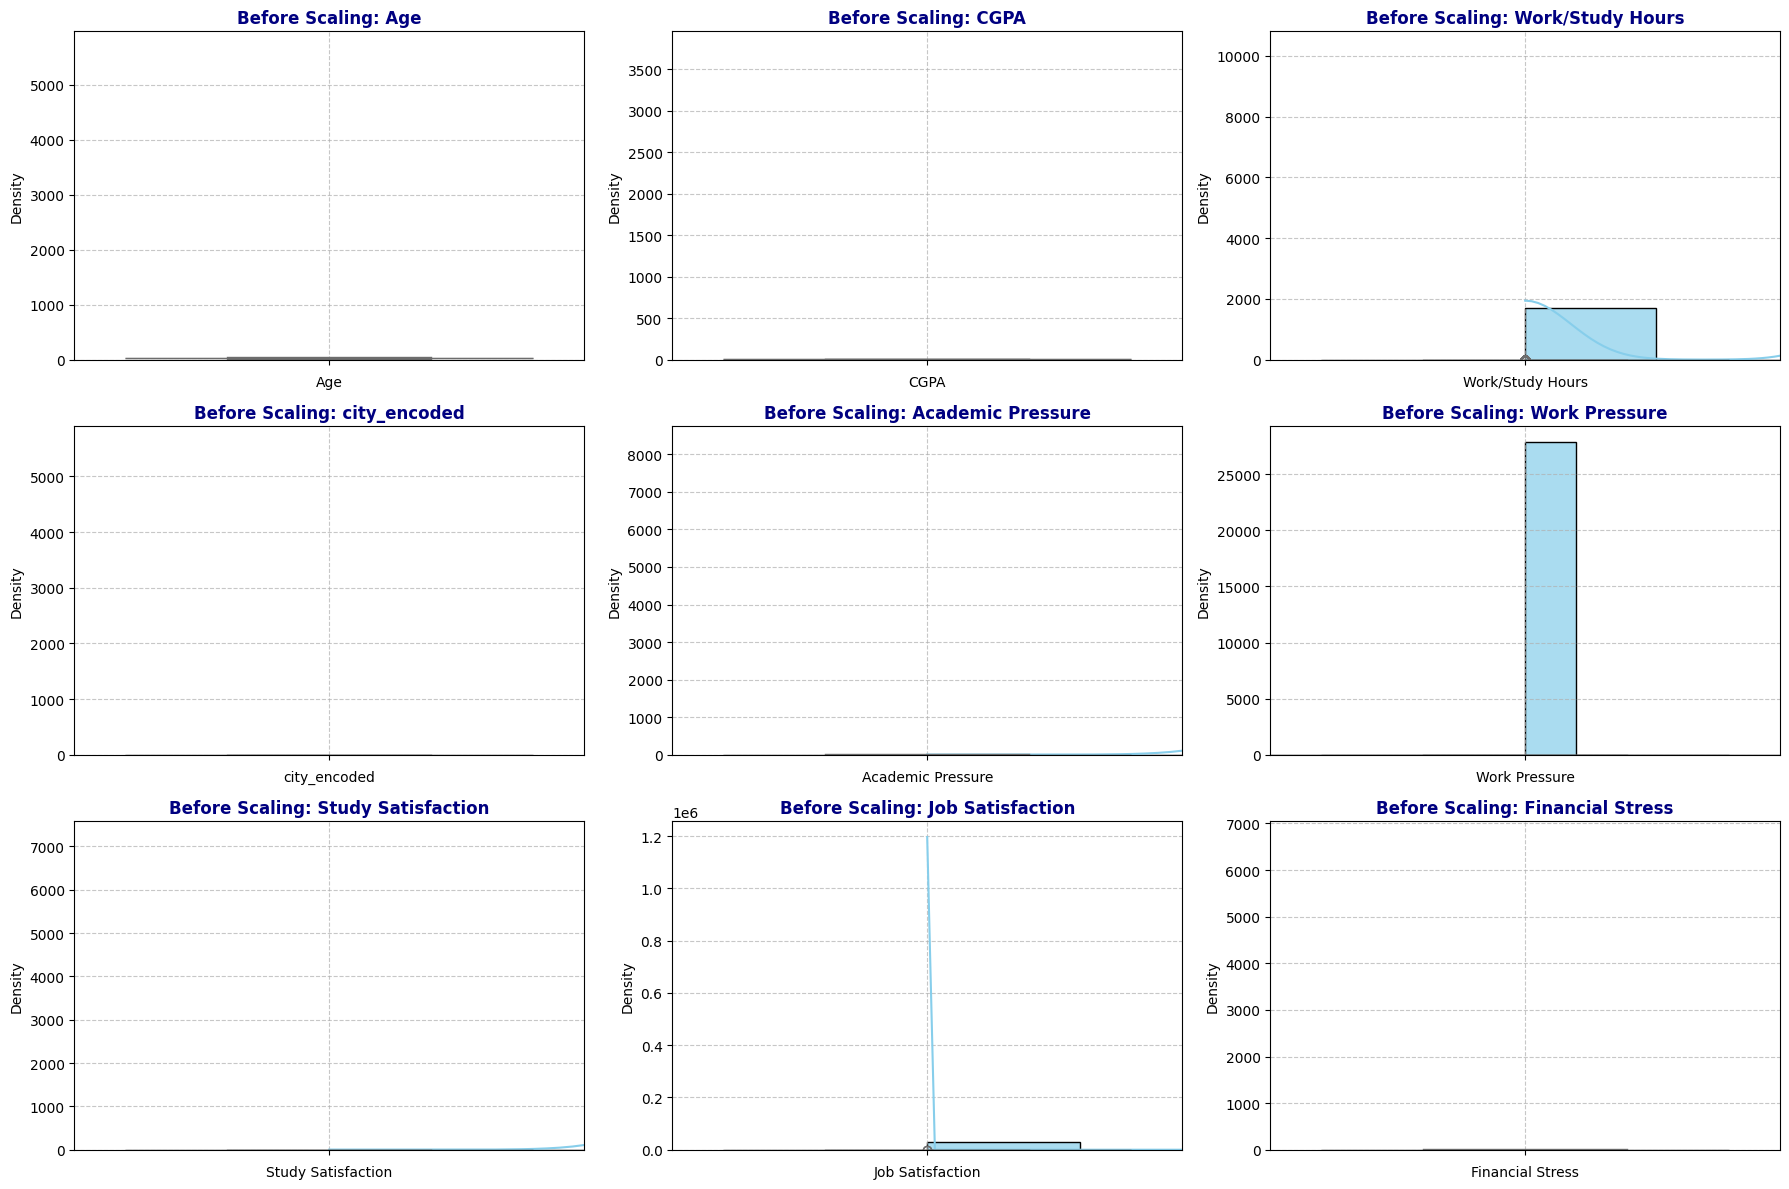

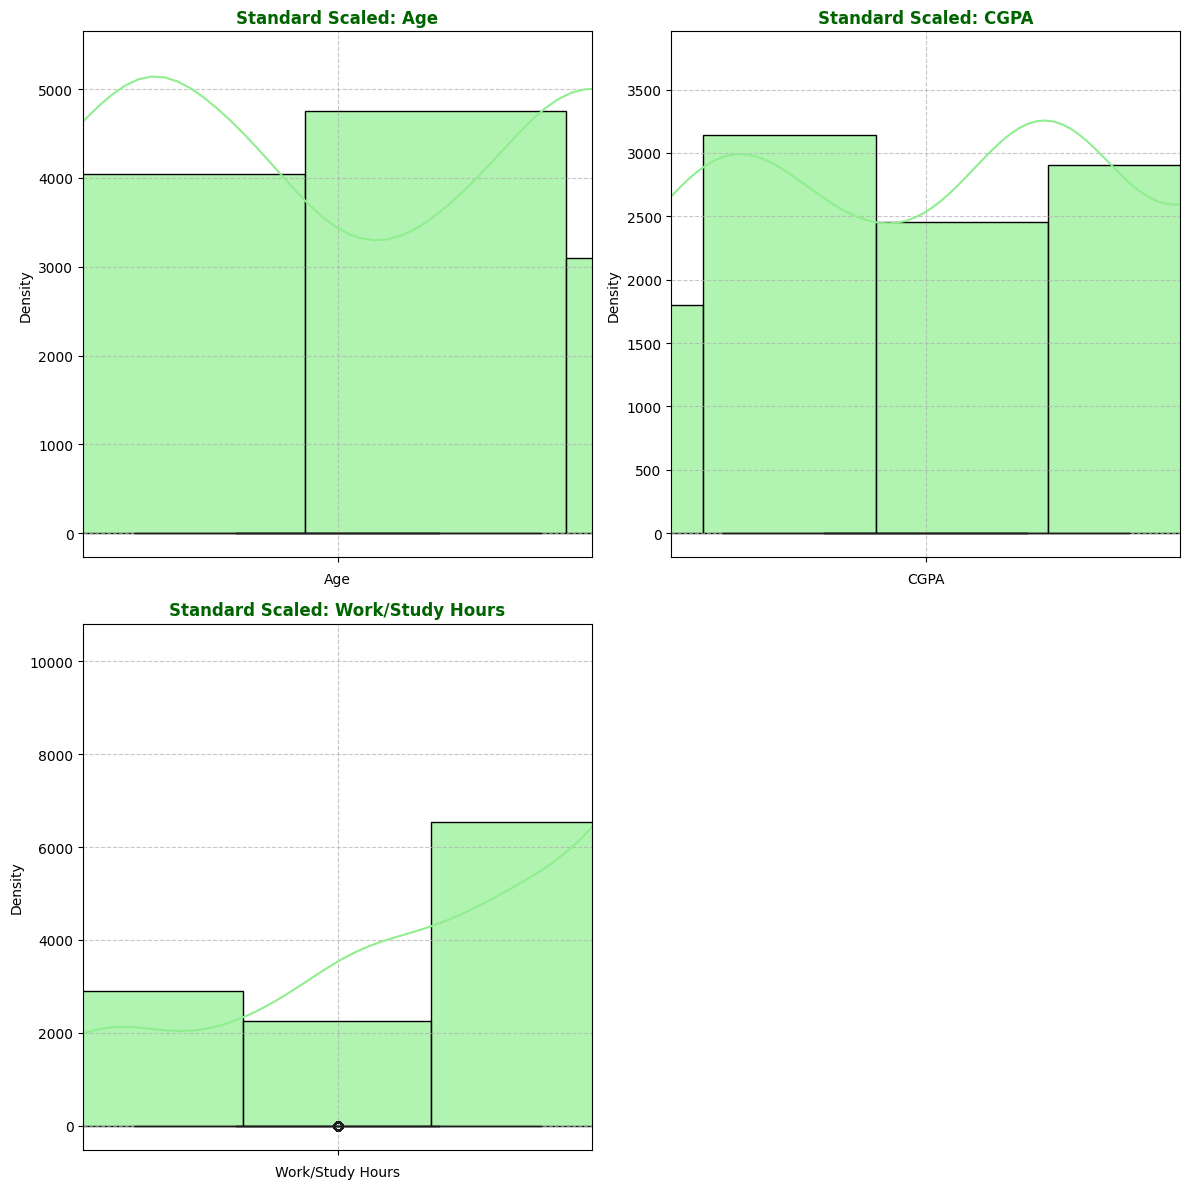

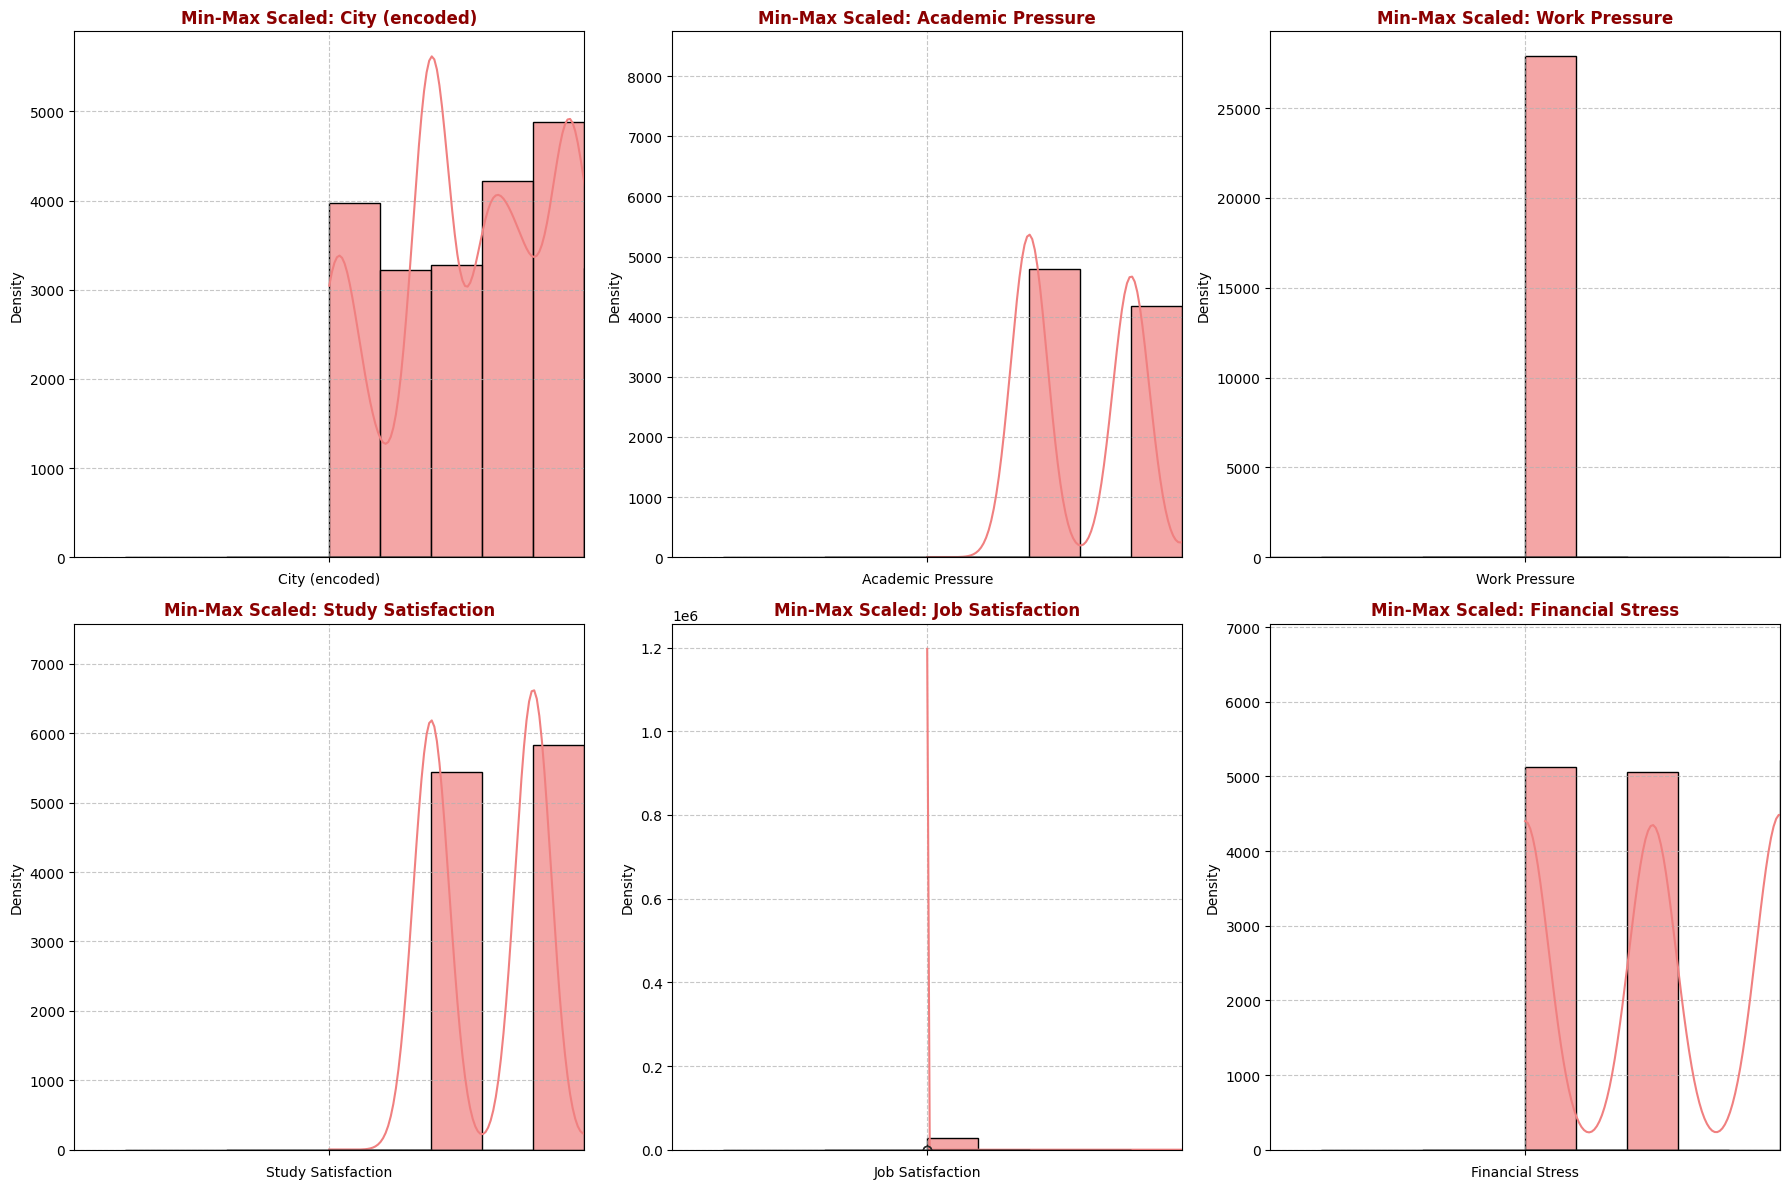


Combined scaled dataset saved as:
- 'scaled_student_depression_dataset.csv'


In [ ]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import os

# Load the outlier-handled dataset
try:
    df = pd.read_csv('outlier_handled_student_depression_dataset.csv')
except FileNotFoundError:
    print("Error: 'outlier_handled_student_depression_dataset.csv' not found. Please run the outlier handling step first.")
    exit()

# Copy original dataframe for comparison
df_original = df.copy()

# Define method-to-column mapping
method_to_columns = {
    'standard': ['Age', 'CGPA', 'Work/Study Hours'],  # Standard Scaling
    'minmax': ['city_encoded', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
               'Job Satisfaction', 'Financial Stress']  # Min-Max Scaling (use city_encoded for City)
}

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling methods and combine into one DataFrame
df_scaled = df_original.copy()

# Apply Standard Scaling and add suffixed columns to df_scaled
standard_cols = method_to_columns['standard']
df_scaled[[f'{col}_standard' for col in standard_cols]] = standard_scaler.fit_transform(df_original[standard_cols])
print("Standard Scaling applied to Age, CGPA, and Work/Study Hours (columns suffixed with '_standard').")

# Apply Min-Max Scaling and add suffixed columns to df_scaled
minmax_cols = method_to_columns['minmax']
df_scaled[[f'{col}_minmax' for col in minmax_cols]] = minmax_scaler.fit_transform(df_original[minmax_cols])
print("Min-Max Scaling applied to city_encoded (City), Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, and Financial Stress (columns suffixed with '_minmax').")

# Display summary statistics (before and after for one column from each method)
print("\nSummary Statistics for 'CGPA' (Standard Scaling Example):")
print("Before Scaling:")
print(df_original['CGPA'].describe())
print("\nAfter Standard Scaling:")
print(df_scaled['CGPA_standard'].describe())

print("\nSummary Statistics for 'Academic Pressure' (Min-Max Scaling Example):")
print("Before Scaling:")
print(df_original['Academic Pressure'].describe())
print("\nAfter Min-Max Scaling:")
print(df_scaled['Academic Pressure_minmax'].describe())

# Enhanced EDA Visualizations
# Columns to visualize before scaling (original names)
cols_before_scaling = method_to_columns['standard'] + method_to_columns['minmax']

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_3'
os.makedirs(output_dir, exist_ok=True)

# Before Scaling
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols_before_scaling, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_original, x=col, color='skyblue', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_original, y=col, color='salmon', boxprops=dict(alpha=0.5))
    plt.title(f'Before Scaling: {col}', fontsize=12, fontweight='bold', color='navy')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_before_enhanced.png'))
plt.show()

# After Standard Scaling
plt.figure(figsize=(12, 12))
for i, col in enumerate(standard_cols, 1):
    scaled_col = f'{col}_standard'
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=scaled_col, color='lightgreen', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_scaled, y=scaled_col, color='darkgreen', boxprops=dict(alpha=0.5))
    plt.title(f'Standard Scaled: {col}', fontsize=12, fontweight='bold', color='darkgreen')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_standard_enhanced.png'))
plt.show()

# After Min-Max Scaling
plt.figure(figsize=(18, 12))
for i, col in enumerate(minmax_cols, 1):
    scaled_col = f'{col}_minmax'
    plt.subplot(2, 3, i)
    sns.histplot(data=df_scaled, x=scaled_col, color='lightcoral', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_scaled, y=scaled_col, color='darkred', boxprops=dict(alpha=0.5))
    display_col_name = col if col != 'city_encoded' else 'City (encoded)'
    plt.title(f'Min-Max Scaled: {display_col_name}', fontsize=12, fontweight='bold', color='darkred')
    plt.xlabel(display_col_name)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45 if col == 'city_encoded' else 0)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_minmax_enhanced.png'))
plt.show()

# Save the combined scaled dataset
df_scaled.to_csv('scaled_student_depression_dataset.csv', index=False)
print("\nCombined scaled dataset saved as:")
print("- 'scaled_student_depression_dataset.csv'")